Accuracy with linear kernel: 1.0
Accuracy with rbf kernel: 1.0
Accuracy with poly kernel: 0.9357142857142857


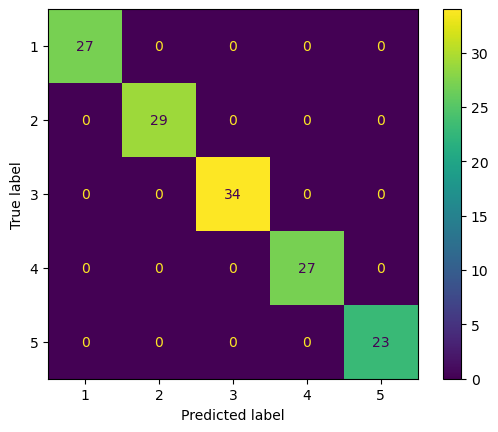

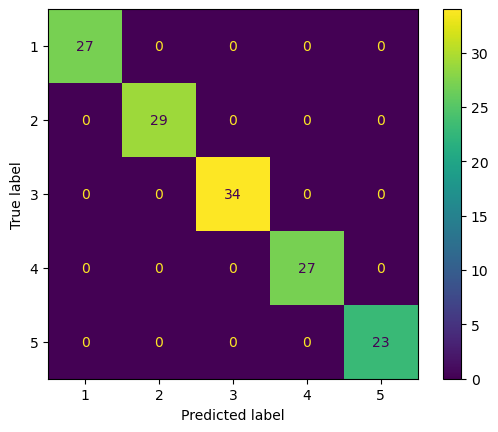

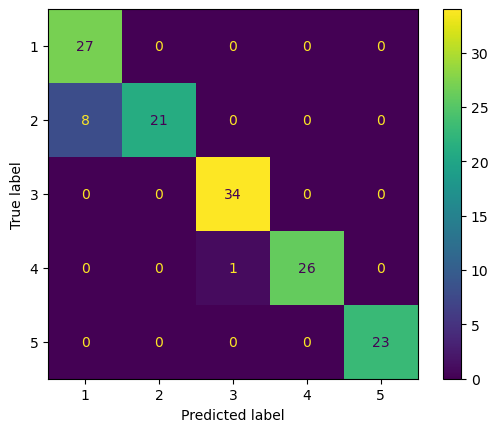

In [ ]:
# SVM 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Load the dataset
data = pd.read_csv("./Datasets/user_behavior_dataset.csv")

# Encode categorical columns
for column in data.select_dtypes('object'):
    data[column] = LabelEncoder().fit_transform(data[column])

# Separate features and target variable
X = data.drop(['User ID', 'User Behavior Class'], axis=1)
y = data['User Behavior Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM with different kernels and compare accuracy
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    
    # Make predictions and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {kernel} kernel: {accuracy}")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
